In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [13]:
weather_data = pd.read_csv('data/weatherHistory.csv')

# Step 1 - First Look at the Data
shape and preview 

In the weather data there are 12 columns and 96453 rows 

In [17]:
weather_data.shape 

(96453, 12)

In [18]:
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [19]:
weather_data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


# step 2 - Column Names & Data Types

In [21]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# step 3 - Data Quality Checks

In [30]:
# Format the date column 
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], utc=True, errors='coerce')

In [31]:
weather_data['Formatted Date'].dtypes

datetime64[ns, UTC]

In [25]:
weather_data['Loud Cover'].value_counts()

Loud Cover
0.0    96453
Name: count, dtype: int64

In [32]:
weather_data.drop(columns= ['Loud Cover'], inplace= True)

# Step 3 - Missing value overview 

In [26]:
weather_data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [28]:
(weather_data.isna().mean() * 100).sort_values(ascending=False)

Precip Type                 0.536012
Formatted Date              0.000000
Summary                     0.000000
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

In [33]:
weather_data['Precip Type'] = weather_data['Precip Type'].fillna('None')

In [37]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               96453 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

# Step 4 - Univariate Analysis

In [38]:
weather_data['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

Distribution plot 

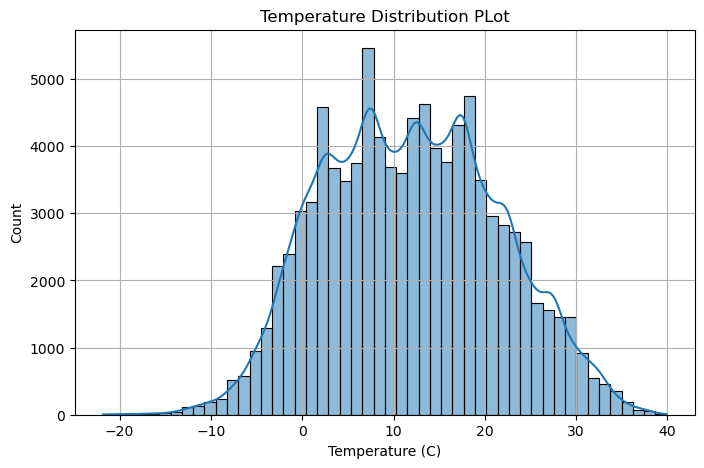

In [43]:
plt.figure(figsize= (8,5))
sns.histplot(weather_data['Temperature (C)'], kde = True, bins= 50)
plt.title("Temperature Distribution PLot")
plt.grid(True)

Checks For Outliers 

<Axes: xlabel='Temperature (C)'>

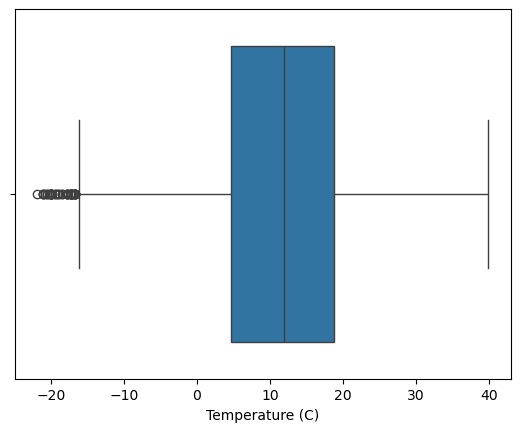

In [40]:
sns.boxplot(x = weather_data['Temperature (C)'])

# Step 5 - Apparent vs Actual Temperature

In [44]:
weather_data[['Temperature (C)', 'Apparent Temperature (C)']].describe()

,Temperature (C),Apparent Temperature (C)
count,96453.000000,96453.000000
mean,11.932678,10.855029
std,9.551546,10.696847
min,-21.822222,-27.716667
25%,4.688889,2.311111
50%,12.000000,12.000000
75%,18.838889,18.838889
max,39.905556,39.344444


Scatter plot 

Text(0.5, 1.0, 'Actual vs Apparent Temperature')

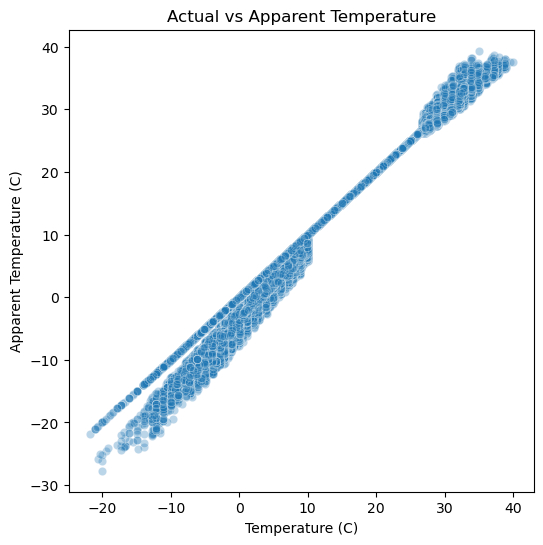

In [45]:
plt.figure(figsize= (6, 6))
sns.scatterplot(x = weather_data['Temperature (C)'], y = weather_data['Apparent Temperature (C)']
               , alpha = 0.3) 
plt.xlabel("Temperature (C)")
plt.ylabel("Apparent Temperature (C)")
plt.title("Actual vs Apparent Temperature")

# Step 6 - Time-Based Analysis

In [47]:
# Setting the date as a index 
weather_data_time = weather_data.set_index('Formatted Date')

# Monthly Average Temperature

C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_5376\2149778788.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = weather_data_time['Temperature (C)'].resample('M').mean()


Text(0, 0.5, 'Temperature (C)')

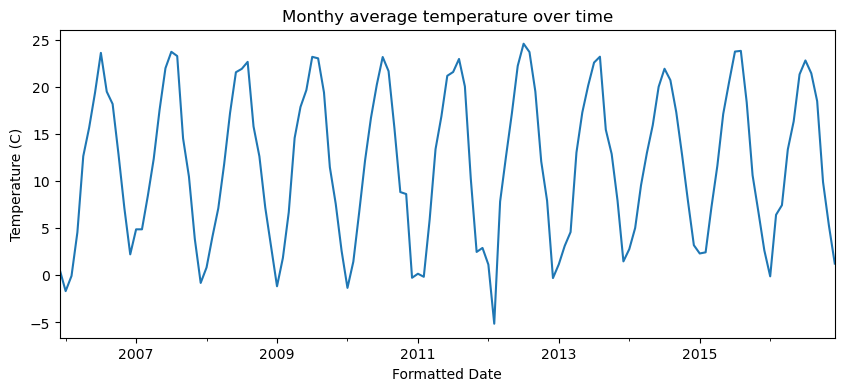

In [49]:
monthly_avg = weather_data_time['Temperature (C)'].resample('M').mean() 
plt.figure(figsize= (10, 4))
monthly_avg.plot() 
plt.title("Monthy average temperature over time")
plt.ylabel('Temperature (C)')

# Yearly Trend

C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_5376\3034762227.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = weather_data_time['Temperature (C)'].resample('Y').mean()


Text(0, 0.5, 'Temperature (C)')

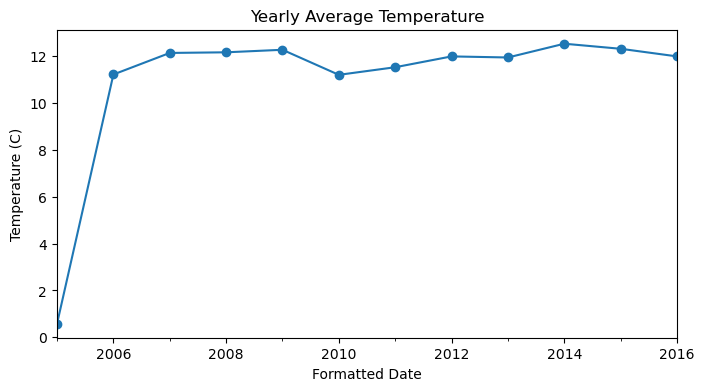

In [50]:
yearly_avg = weather_data_time['Temperature (C)'].resample('Y').mean() 

plt.figure(figsize= (8, 4))
yearly_avg.plot(marker = 'o')
plt.title('Yearly Average Temperature')
plt.ylabel('Temperature (C)')

# Rain vs Snow

In [51]:
# Extract month 
weather_data['month'] = weather_data['Formatted Date'].dt.month

In [53]:
# Avg temperature by precip type 
weather_data.groupby('Precip Type')['Temperature (C)'].mean()

Precip Type
None    10.393015
rain    13.852989
snow    -3.270885
Name: Temperature (C), dtype: float64

# Monthly Distribution of Rain vs Snow

Text(0.5, 1.0, 'Precipitation type by month')

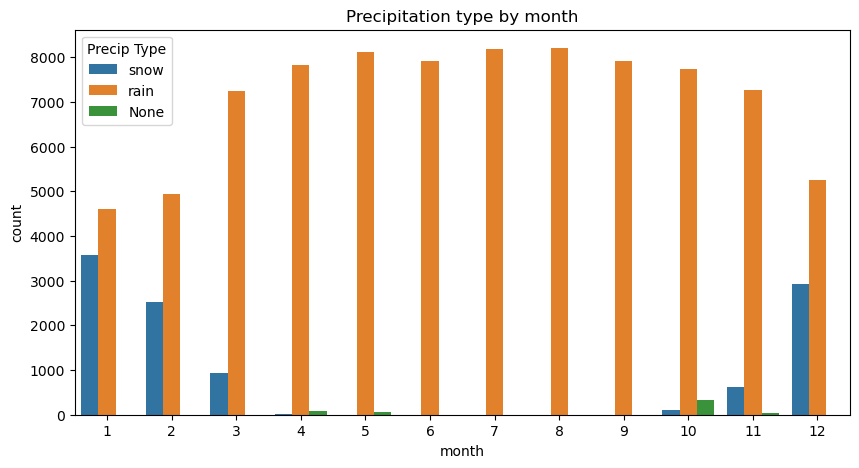

In [55]:
plt.figure(figsize= (10, 5))
sns.countplot(x = 'month', hue= 'Precip Type', data= weather_data)
plt.title('Precipitation type by month')

# Investigate Snow in Month 5

In [58]:
weather_data[(weather_data['Precip Type'] == 'snow') & (weather_data['month'] == 5)][
    ['Formatted Date', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
].head()

,Formatted Date,Temperature (C),Humidity,Wind Speed (km/h)


# Humidity & Wind

Text(0.5, 1.0, 'Humidity VS Temperature')

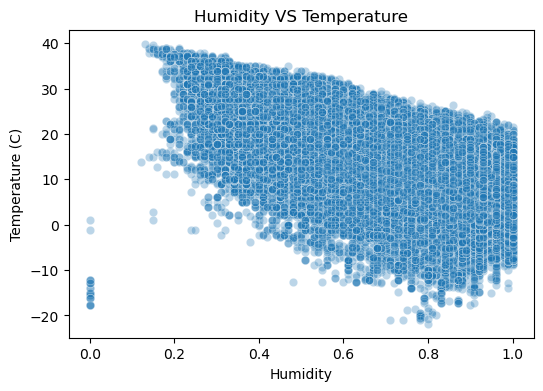

In [59]:
plt.figure(figsize= (6, 4)) 
sns.scatterplot(x = weather_data['Humidity'], y = weather_data['Temperature (C)'],
               alpha = 0.3) 
plt.title("Humidity VS Temperature")

# Wind Speed vs Apparent Difference

In [60]:
weather_data['Temp_diff'] = weather_data['Temperature (C)'] - weather_data['Apparent Temperature (C)']

Text(0.5, 1.0, 'Wind speed VS Temperature DIfference')

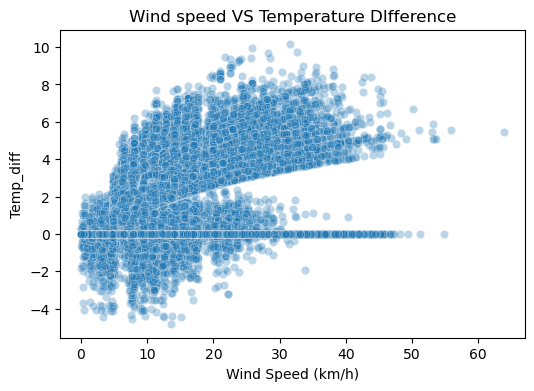

In [61]:
plt.figure(figsize= (6, 4))
sns.scatterplot(x = weather_data['Wind Speed (km/h)'], 
               y = weather_data['Temp_diff'], 
               alpha = 0.3)
plt.title("Wind speed VS Temperature DIfference")